In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
import scipy.ndimage as ndimage

In [2]:
#img = cv2.imread('fruta.jpg')
#img = cv2.imread('bananos.jpg')
img = cv2.imread('000078.jpg')

In [3]:
hsv =  cv2.cvtColor(img, cv2.COLOR_BGR2HSV)

In [4]:
I=cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

otsu method: we want to extract the picture from the background
to do this we consider the different grey levels 
this is done automatically with a function
we first set a thresold

In [5]:
threshold,_ = cv2.threshold(I, 0, 255, cv2.THRESH_OTSU)


In [6]:
mask = np.uint8((I<threshold)*255)

#receives binary image and returns the number of labels and the label matrix
output = cv2.connectedComponentsWithStats(mask, 4, cv2.CV_32S)
qty_objects = output[0]
labels = output[1]
stats = output[2]


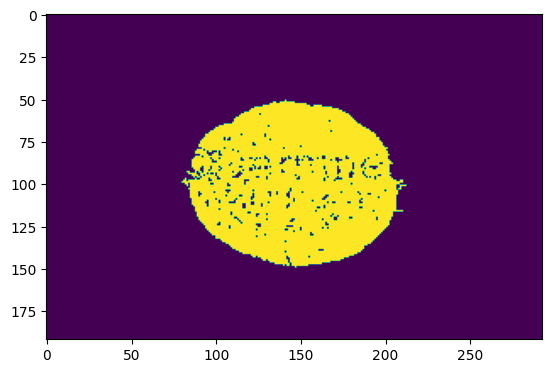

In [7]:
mask=(np.argmax(stats[:,4][1:])+1==labels)
#show mask as image
plt.imshow(mask)


image is full of spots, we need to fill these with a function

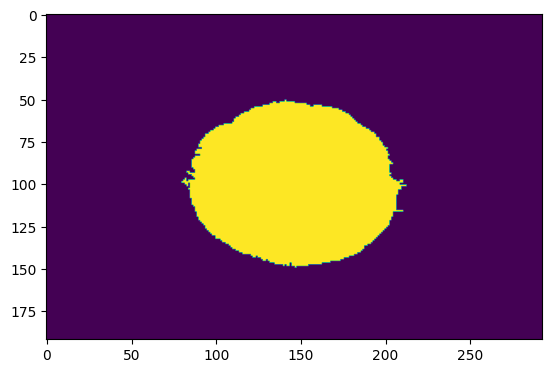

In [13]:
mask = ndimage.binary_fill_holes(mask).astype(int)
plt.imshow(mask)

much better now...

In [15]:
mask1=np.uint8(mask*255)
_, countours,_= cv2.findContours(mask1, cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE)
cnt=countours[0]

In [16]:
perimeter = cv2.arcLength(cnt,True)
area = cv2.contourArea(cnt)
#area1 = np.sum(mask1/255) #alternative method to calculate area

In [17]:
#convex hull
hull = cv2.convexHull(cnt)
hull_area = hull[:,0,:]
m,n=mask1.shape
ar=np.zeros((m,n))
mask_convex = cv2.fillConvexPoly(ar, hull_area, 1)



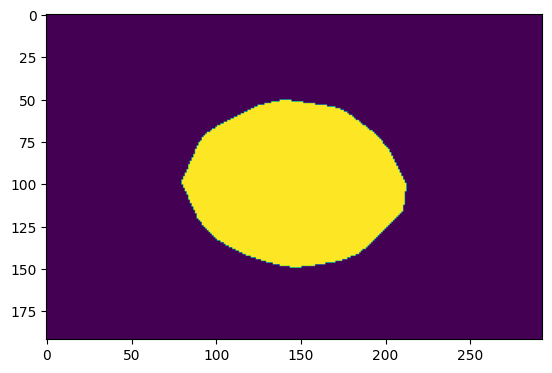

In [18]:
#show mask as image
plt.imshow(mask_convex)

In [8]:
data=I.flatten()

(array([1.000e+00, 1.000e+00, 2.000e+00, 1.000e+00, 2.000e+00, 7.000e+00,
        8.000e+00, 1.000e+01, 1.500e+01, 2.100e+01, 3.200e+01, 4.700e+01,
        1.900e+01, 4.700e+01, 8.400e+01, 1.060e+02, 1.570e+02, 2.110e+02,
        1.060e+02, 2.350e+02, 3.000e+02, 3.250e+02, 3.680e+02, 4.170e+02,
        1.930e+02, 4.160e+02, 4.350e+02, 4.400e+02, 4.510e+02, 3.850e+02,
        3.750e+02, 2.370e+02, 3.810e+02, 3.550e+02, 3.180e+02, 2.940e+02,
        2.590e+02, 1.070e+02, 1.990e+02, 1.990e+02, 1.760e+02, 1.480e+02,
        1.530e+02, 5.900e+01, 1.260e+02, 1.240e+02, 1.230e+02, 1.300e+02,
        1.400e+02, 5.500e+01, 1.180e+02, 1.200e+02, 1.530e+02, 1.780e+02,
        2.490e+02, 3.770e+02, 2.330e+02, 6.450e+02, 7.760e+02, 8.340e+02,
        8.920e+02, 1.109e+03, 5.780e+02, 1.303e+03, 1.278e+03, 1.217e+03,
        1.306e+03, 1.418e+03, 7.770e+02, 1.616e+03, 1.796e+03, 1.714e+03,
        1.732e+03, 1.638e+03, 9.040e+02, 1.825e+03, 1.883e+03, 2.038e+03,
        2.320e+03, 2.590e+03, 2.736e+0

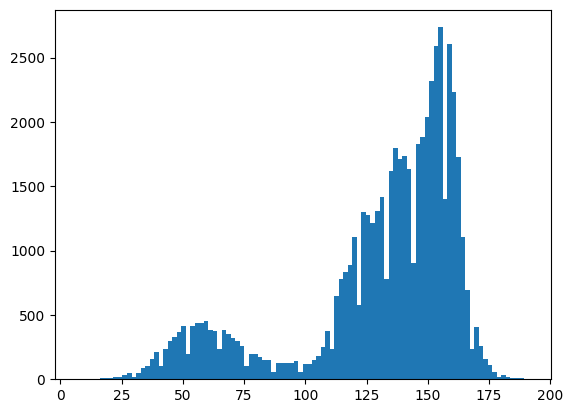

In [9]:
plt.hist(data, bins=100)

(array([1.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00,
        0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00,
        0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00,
        0.000e+00, 0.000e+00, 0.000e+00, 1.000e+00, 0.000e+00, 0.000e+00,
        0.000e+00, 0.000e+00, 0.000e+00, 1.000e+00, 0.000e+00, 0.000e+00,
        0.000e+00, 0.000e+00, 2.000e+00, 0.000e+00, 0.000e+00, 0.000e+00,
        0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00,
        0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00,
        1.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00,
        3.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 2.000e+00,
        0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 2.000e+00, 0.000e+00,
        0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 3.000e+00, 0.000e+00,
        0.000e+00, 0.000e+00, 0.000e+00, 1.200e+01, 0.000e+00, 0.000e+00,
        0.000e+00, 0.000e+00, 0.000e+0

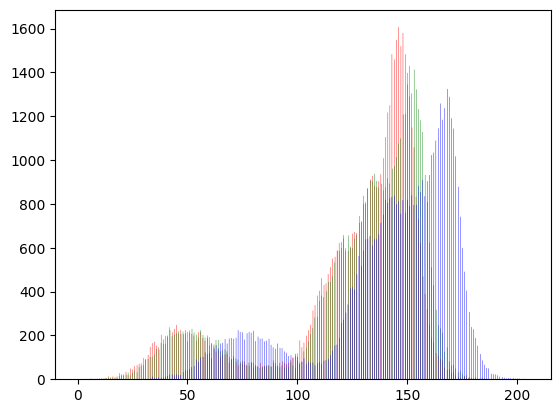

In [10]:
#to see all components in the same window

red = img[:,:,0].flatten()
green = img[:,:,1].flatten()
blue = img[:,:,2].flatten()

#red component has values closer to 0
plt.hist(red, bins=1000, histtype='stepfilled', color='red')
#intermediate values
plt.hist(green, bins=1000, histtype='stepfilled', color='green')
#blue component has values closer to 255
plt.hist(blue, bins=1000, histtype='stepfilled', color='blue')

In [10]:
cv2.imshow('img', mask)
cv2.waitKey(0)
cv2.destroyAllWindows()